In [ ]:
import pandas as pd


In [ ]:
df= pd.read_excel("/content/04.APRILE_Iveco_FB_IG_MEDIA_apr2022 4.xlsx", sheet_name="Raw Data Report_NEW")

In [ ]:
df['CPM']= (df['Importo speso (EUR)']/df['Impression'])*1000

In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Load the Training Dataset**

In [ ]:
dataset_train=pd.read_excel("/content/train_cpm.xlsx")
dataset_train['CPM']= (dataset_train['Importo speso (EUR)']/dataset_train['Impression'])*1000
dataset_train.head(2)

,Tipologia,Obiettivo,Nome della campagna,Stato di pubblicazione,Livello di pubblicazione,Tipo di risultato,Risultati,Copertura,Impression,Costo per risultato,...,Commenti ai post,"""Mi piace"" sulla Pagina",Clic (tutti),Inizio dei report,Fine dei report,IR%,mese,open,close,CPM
0,Video,VIDEO_VIEWS,[OG] Videoviews_4-6gen2022_DakarKICKOFF_PPV_FBIG,not_delivering,ad,ThruPlay,11187,38197,49136,0.008939,...,1.0,NaN,339,2022-01-01,2022-04-05,0.355361,1,2022-01-04,2022-01-06,2.035168
1,Video,VIDEO_VIEWS,[OG] Videoviews_4-14gen2022_Dakar_PPV_IGStory,inactive,ad,ThruPlay,2477,2174,3418,0.006019,...,NaN,NaN,4,2022-01-01,2022-04-05,0.805442,1,2022-01-04,2022-01-14,4.362200


**Use the CPM column to train the model**

In [ ]:
dataset_train.shape

(305, 34)

In [ ]:
training_set=dataset_train.iloc[:,33:34].values

**Normalizing the Dataset.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))


scaled_training_set = scaler.fit_transform(training_set)


**Creating X_train and y_train Data Structures**

In [ ]:
scaled_training_set.shape 

(305, 1)

In [ ]:
X_train= []
y_train= []

In [ ]:
for i in range(60, 305):
  X_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i,0])

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)

**Reshape the Data.**

In [ ]:
X_train=np.reshape(X_train,( X_train.shape[0], X_train.shape[1],1) )
X_train.shape

(245, 60, 1)

**Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.**


In [ ]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential


In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))



**Fitting the Model**

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=7000, batch_size=32)

Output streaming troncato alle ultime 5000 righe.
8/8 [==============================] - 0s 23ms/step - loss: 0.0037
Epoch 4502/7000
8/8 [==============================] - 0s 22ms/step - loss: 0.0044
Epoch 4503/7000
8/8 [==============================] - 0s 22ms/step - loss: 0.0041
Epoch 4504/7000
8/8 [==============================] - 0s 22ms/step - loss: 0.0032
Epoch 4505/7000
8/8 [==============================] - 0s 22ms/step - loss: 0.0033
Epoch 4506/7000
8/8 [==============================] - 0s 21ms/step - loss: 0.0032
Epoch 4507/7000
8/8 [==============================] - 0s 23ms/step - loss: 0.0028
Epoch 4508/7000
8/8 [==============================] - 0s 23ms/step - loss: 0.0031
Epoch 4509/7000
8/8 [==============================] - 0s 22ms/step - loss: 0.0025
Epoch 4510/7000
8/8 [==============================] - 0s 24ms/step - loss: 0.0025
Epoch 4511/7000
8/8 [==============================] - 0s 23ms/step - loss: 0.0022
Epoch 4512/7000
8/8 [==============================] 

**Actual CPM**

In [ ]:
dataset_test=pd.read_excel("/content/test_cpm.xlsx")
dataset_test['CPM']= (dataset_test['Importo speso (EUR)']/dataset_test['Impression'])*1000

In [ ]:
dataset_test.shape

(76, 34)

In [ ]:
actual_cpm_price= dataset_test.iloc[:,33:34].values

Preparing the input for the model

In [ ]:
dataset_total=pd.concat((dataset_train['CPM'], dataset_test['CPM']), axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs= inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test=[]
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])


X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Predicting the values

In [ ]:
predicted_cpm_price=regressor.predict(X_test)
predicted_cpm_price=scaler.inverse_transform(predicted_cpm_price)

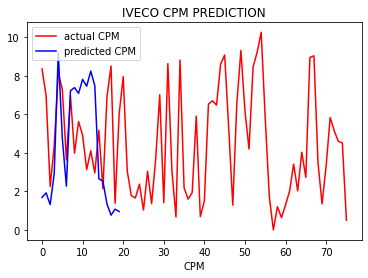

In [ ]:
plt.plot(actual_cpm_price, color='red', label='actual CPM')
plt.plot(predicted_cpm_price, color='blue', label='predicted CPM')
plt.title('IVECO CPM PREDICTION')
plt.xlabel('time')
plt.xlabel('CPM')
plt.legend()